### NOTE:
Here, we are using the holiday variable of prophet model and show that, by going from additive to multiplicative seasonality and including the holiday sale propely, we are able to fit the data well

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')

In [20]:
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quarter     61 non-null     object
 1   Revenue     61 non-null     int64 
 2   Net Income  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [21]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [4]:
df.isnull().any()

Quarter       False
Revenue       False
Net Income    False
dtype: bool

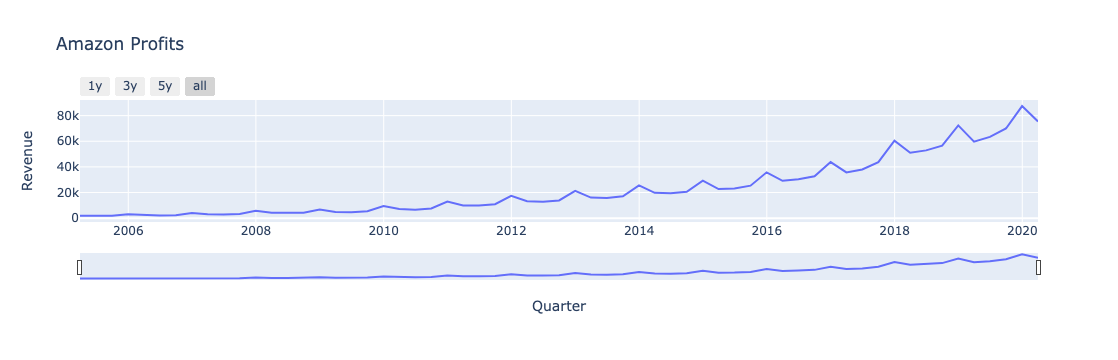

In [22]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Profits')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [24]:
from prophet import Prophet

In [25]:
amazon_df = df[['Quarter' , 'Revenue']].rename({'Quarter':'ds', 'Revenue':'y'}, axis = 'columns')

In [26]:
train=amazon_df[(amazon_df['ds'] >= '2005-03-31') & (amazon_df['ds'] <= '2019-03-31')]
test=amazon_df[(amazon_df['ds'] > '2019-03-31')]

In [27]:
m = Prophet(interval_width = 0.95)

In [28]:
m.fit(train)

07:47:20 - cmdstanpy - INFO - Chain [1] start processing
07:47:20 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
test.shape

(4, 2)

In [29]:
future = m.make_future_dataframe(periods = 4, freq = 'Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.980576,57014.128221,65123.539565
57,2019-06-30,63195.687508,59229.972589,67670.229997
58,2019-09-30,66153.559581,61800.108920,70098.146945
59,2019-12-31,74249.801000,70317.096977,78393.150338
60,2020-03-31,70663.823575,66664.030517,74963.092421


<Axes: xlabel='ds'>

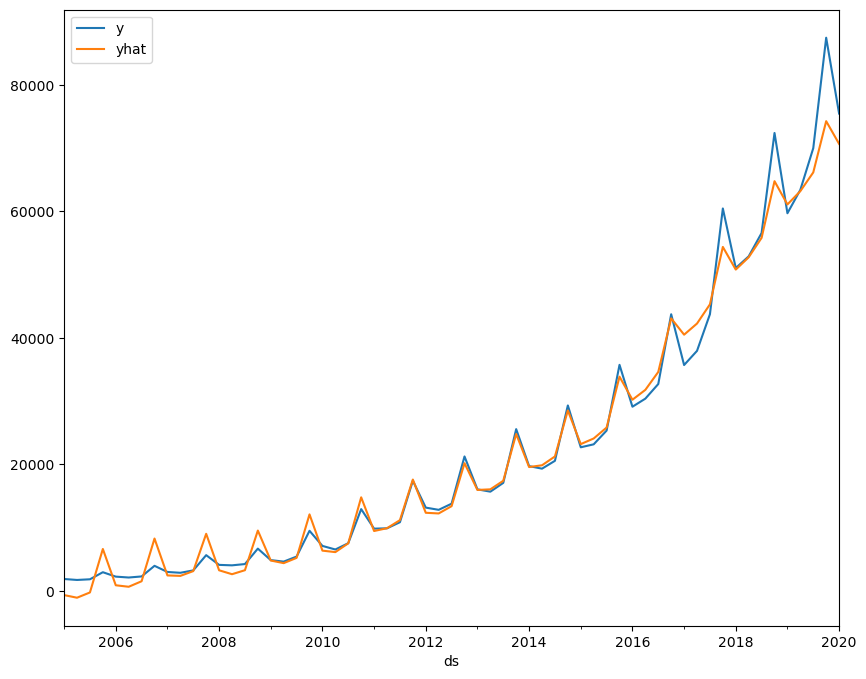

In [33]:
pd.concat([amazon_df.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis = 1).plot()

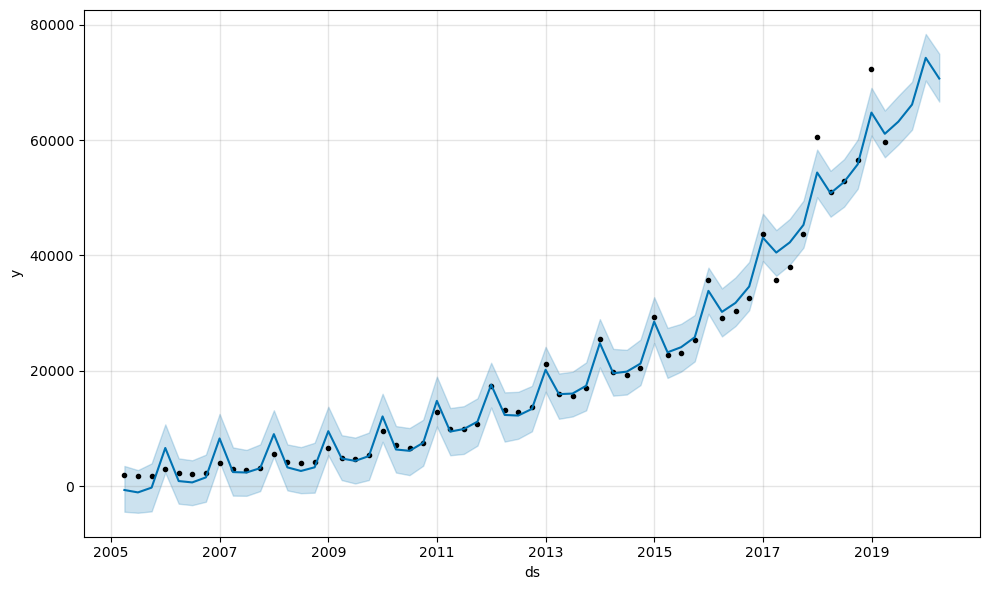

In [34]:
fig1 = m.plot(forecast)

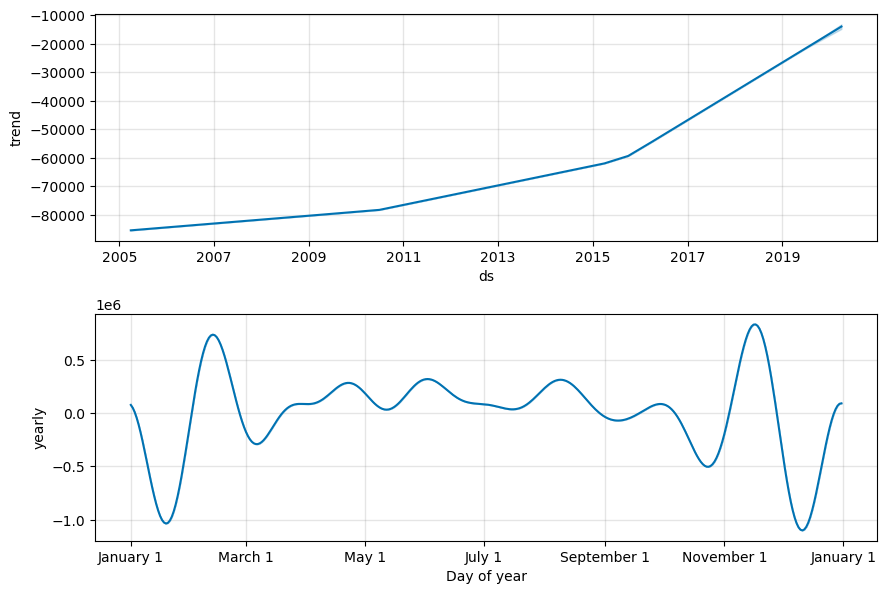

In [35]:
fig2 = m.plot_components(forecast)

In [36]:
holiday_sale = pd.DataFrame({
    'holiday':'dec_jan_sale',
    'ds' : pd.to_datetime(['2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31',
                        '2015-12-31', '2014-12-31','2013-12-31','2012-12-31','2011-12-31','2010-12-31','2009-12-31','2008-12-31','2007-12-31',
                        '2006-12-31','2005-12-31']),
    'lower_window':0,
    'upper_window':1,
})

In [38]:
m2 = Prophet(interval_width = 0.95, seasonality_mode = 'multiplicative', holidays = holiday_sale)

In [39]:
m2.fit(train)

07:55:28 - cmdstanpy - INFO - Chain [1] start processing
07:55:28 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60100.500822,58275.179330,61812.865086
57,2019-06-30,62629.641730,60891.102955,64504.977851
58,2019-09-30,67790.775255,66032.141895,69517.480510
59,2019-12-31,89316.634470,87409.531622,91173.117188
60,2020-03-31,66826.245122,64761.868345,68917.482218


<Axes: xlabel='ds'>

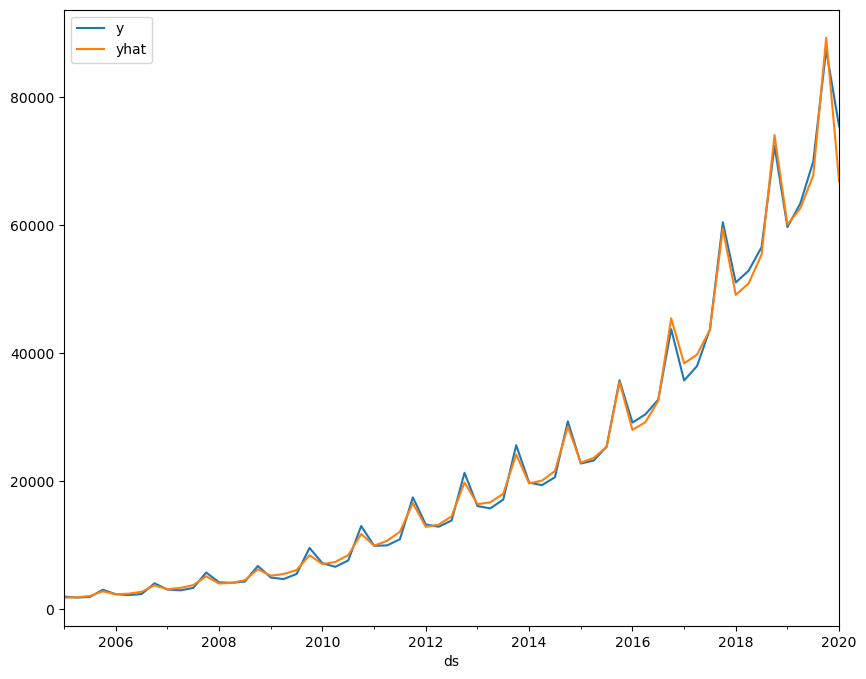

In [41]:
pd.concat([amazon_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

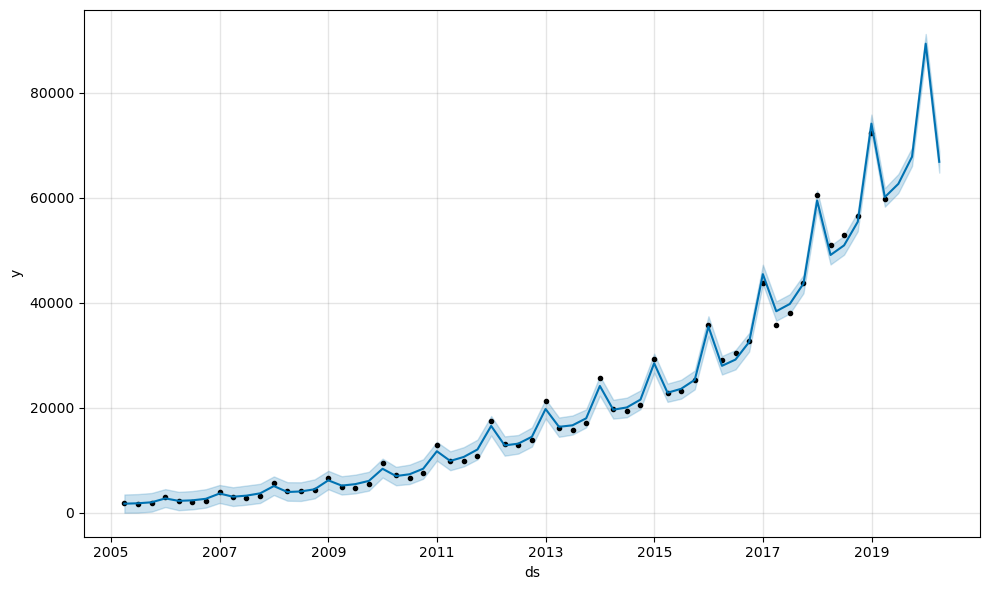

In [42]:
fig1 = m2.plot(forecast)

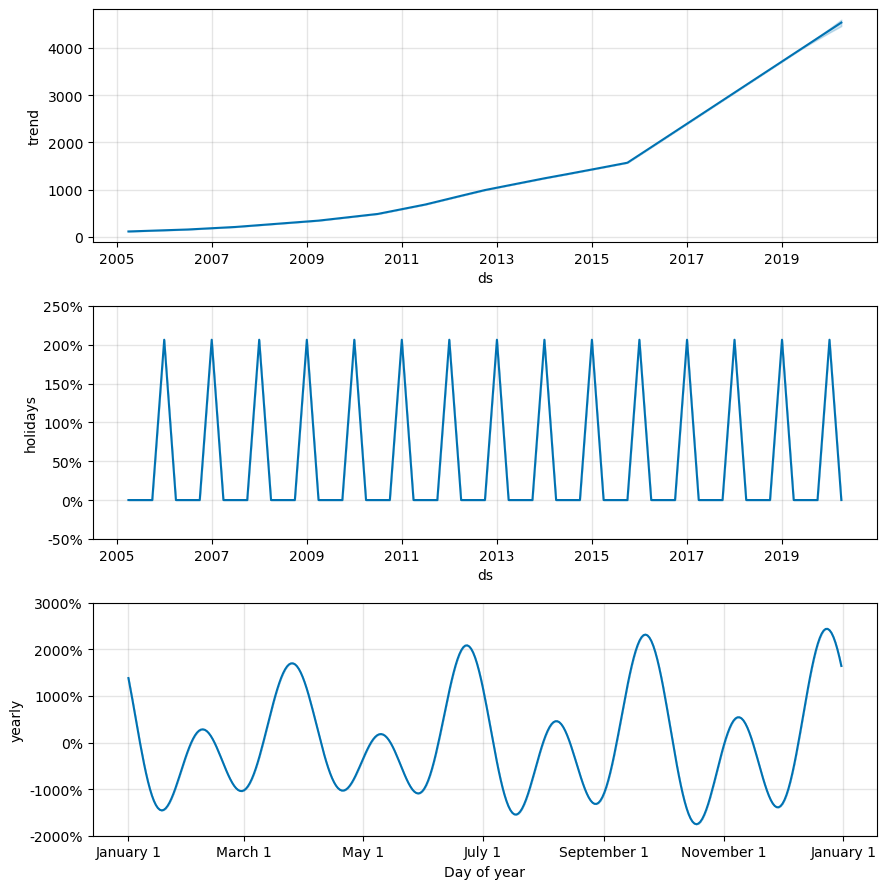

In [43]:
fig2 = m2.plot_components(forecast)